# Assignment 1: Find a path from the start to the goal

This assignment is worth 15/100 points. 

You need to do this assignment with a group of maximum 3 people in total.

You will program path-finding algorithms using informed and uninformed search and compare them. You will need to implement the following algorithms:

Uninformed Search: 
- BFS
- DFS

Informed Search:
- A*

Answer to all the questions in english, argument, and justify your answers using the obtained results.

### Deadline
March 3th, 2023 at 23.59

### Some Instructions
- You need to fill in your answers here and submit this jupyter notebook via NEO.
- It should run smoothly.
- Any compilation error will affect your total score. 


### Important before starting! 

- DO NOT copy the answers from internet nor from your classmates.
- If there are two or more groups that were discovered cheeting, then they will be penalized with 0/15.
- Use your brain and the material seen in class to program this assignment.
- You should be able to explain and modify your code according to your (or my) needs. 

### Names
You and your classmate names:
- Name 1
- Name 2
- Name 3


## Code for drawing the map

The following code will help you draw the map. You don't need to modify it.

#### Import libraries

In [141]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from queue import Queue
from queue import LifoQueue
from queue import PriorityQueue
import math

#### Read map from file and define where the start and goal positions are

In [142]:
map_file = "map1.txt"
start_char = '1'
goal_char = '4'
tree_char = '2'
water_char = '3'
visited_char = '5'

def read_map_file(file_name = "map1.txt"):
    i = 0
    j = 0
    my_map = []
    start = [0,0]
    goal  = [0,0]
    with open(file_name) as f:
        lines = f.readlines()
        for line in lines:
            line_arr = []
            j = 0
            for char in line:
                # skip carry char
                if char != '\n':
                    line_arr.append(int(char))
                # start char is 1
                if char == start_char:
                    start = [j, i]
                # end char is 3
                if char == goal_char:
                    goal = [j, i]

                j += 1
            my_map.append(line_arr)
            i += 1
        return my_map, start, goal

my_map, start, goal = read_map_file()
print('Start at:', start)
print('Goal at:', goal)

Start at: [2, 6]
Goal at: [16, 2]


#### Draw the map

In [143]:
# inspired by: https://stackoverflow.com/questions/38973868/adjusting-gridlines-and-ticks-in-matplotlib-imshow
def draw_map(my_map, path = []):
    xlen = len(my_map[0])
    ylen = len(my_map)
    colormap = colors.ListedColormap(["white","yellow",'lightgreen', 'cyan', 'red', 'Linen'])
    
    # set ticks top and bottom
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    
    plt.figure()
    im = plt.imshow(my_map, cmap = colormap)
    ax = plt.gca();

    # Major ticks
    ax.set_xticks(np.arange(0, xlen, 1))
    ax.set_yticks(np.arange(0, ylen, 1))

    # Labels for major ticks
    ax.set_xticklabels(np.arange(0, xlen, 1))
    ax.set_yticklabels(np.arange(0, ylen, 1))

    # Minor ticks
    ax.set_xticks(np.arange(-.5, xlen, 1), minor=True)
    ax.set_yticks(np.arange(-.5, ylen, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)
    
    for step in path:
        plt.plot(step[0], step[1], marker='o', color='b')
        
    ax.text(start[0]-0.3, start[1]+ 0.3, 'S', fontsize=13)
    ax.text(goal[0]-0.3, goal[1]+ 0.3, 'G', fontsize=13)

    plt.show()

## Exercise Problem-Solver Agent

1. What is an Agent?

In [1]:
# here your answer

2. What is a Problem-Solver Agent? Define a problem-solver agent to find the path between two points in a map.

In [1]:
# here your answer

## Exercise Uninformed Search

#### color code:

Here is what every element in the map means:

- white (0):   blank space
- yellow (1):  starting position
- green (2):   trees
- cyan (3):    water
- red (4):     goal position
- brown (5):  expanded state (already visited)


For uninformed search let's suppose:
- the agent can't go through trees nor water (they are obstacles).
- the cost to go from one state to another is 1.

#### BFS

1. Implement BFS algorithm to find the path between start and goal. To help you out with this task you can complete the code below using what we have seen in class.

In [56]:
actions = ['U', 'D', 'L', 'R']

class State:
    def __init__(self):
        self.father = None
        self.value = None

def get_path(state):
    # your code here

def goal_test(state, goal):
    # your code here

def tf(state, action, my_map):
    x = state[0]
    y = state[1]
    limit_x = len(my_map[0]) - 1
    limit_y = len(my_map) - 1
    next_state = None
    if action == 'L' and x > 0:
        next_state =  [x-1, y]
    elif action == 'R' and x < limit_x:
        next_state = [x+1, y]
    elif action == 'U' and y > 0:
        next_state = [x, y-1]
    elif action == 'D' and y < limit_y:
        next_state = [x, y+1]
    
    if next_state is not None:
        # verify if we already visited that state
        
        # your code here
        
            return True, next_state
        
    return False, _

def bfs(start, goal, actions, my_map):
    start_state = State()
    start_state.value = start
    open_states = # your code here
    open_states.put(start_state)
    
    while # your code here:
        state = open_states.get()
        my_map[state.value[1]][state.value[0]] = int(visited_char)
        
        if (goal_test(state.value, goal)):
            return (True, state)
        
        for action in actions:
            # your code here
    return False, _


Solution found?  True


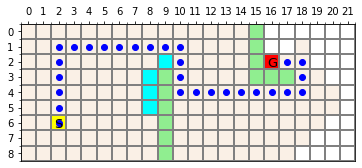

In [57]:
my_map, start, goal = read_map_file()
found, goal_state = bfs(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
draw_map(my_map, path)

#### DFS

1. Implement DFS algorithm to find the path between start and goal.

In [62]:
def dfs(start, goal, actions, my_map):
    # your code here
    return False, _

In [ ]:
my_map, start, goal = read_map_file()
found, goal_state = dfs(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
path = get_path(goal_state.father)
draw_map(my_map, path)

2. Now change the order of the actions. Do you have a shorter path (hint: to answer this, calculate the cost of the path and experiment with diferent order for the actions)? Why is that?

In [ ]:
# your code here

3. Does it happen the same thing when you change the order of actions for BFS (hint: to answer this calculate the cost of the path and experiment with diferent order for the actions)? Experiment, show your results and discuss.

In [2]:
# your code here

4. Did BFS or DFS find the optimal path? What is the cost of it? Give some examples

In [ ]:
# your code here

5. Execute BFS and DFS for the map2.txt file. Which one finds a better path? Which one would you choose for the path-finding problem? 

In [ ]:
actions = ['U', 'D', 'L', 'R']

# your code here

## Exercises Informed Search

1. Let's suppose:
- the agent can now go through trees and water.
- the cost to go from one state to another is:
    - empty spaces: 1
    - trees: 3
    - water: 5
    
Solve the problem using A* using the Manhattan distance as a heuristic. 

You may use map3.txt and map4.txt here.

In [1]:
# your code here

2. How many states expands A*?

In [2]:
# your answer here

3. Is A* optimal and complete for this case? Justify your answers

In [3]:
# your answer here

4. Create an empty map of 21x21 put the start position in one extreme, the goal position in another and execute BFS and A* in this map and compare both algorithms. Answer some questions such as: what is the states space? which one expands/visits less states? which one does a better job? 

In [4]:
# your answer here